## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_mob_home.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 33 columns):
DAMAGE_PROPERTY       8230 non-null float64
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 1 columns):
DAMAGE_PROPERTY    8230 non-null float64
dtypes: float64(1)
memory usage: 64.4 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8230 entries, 0 to 8229
Data columns (total 32 columns):
DURATION_SECONDS      8230 non-null float64
BEGIN_LAT             8230 non-null float64
BEGIN_LON             8230 non-null float64
TOR_LENGTH            8230 non-null float64
TOR_WIDTH             8230 non-null float64
YEAR                  8230 non-null float64
OPEN_WATER_PROP       8230 non-null float64
DEV_OPEN_PROP         8230 non-null float64
DEV_LOW_PROP          8230 non-null float64
DEV_MED_PROP          8230 non-null float64
DEV_HIGH_PROP         8230 non-null float64
DECID_FOREST_PROP     8230 non-null float64
EVERGR_FOREST_PROP    8230 non-null float64
MIXED_FOREST_PROP     8230 non-null float64
SHRUB_SCRUB_PROP      8230 non-null float64
GRASS_LAND_PROP       8230 non-null float64
PASTURE_HAY_PROP      8230 non-null float64
CULT_CROPS_PROP       8230 non-null float64
WOOD_WETLAND_PROP     8230 non-null float64
HERB_WETLAND_PROP     8230 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.7085
 0.5805
 0.7085
   ⋮    
 0.9397
 0.9644
 0.7085
[torch.DoubleTensor of size 8230x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.DoubleTensor of size 8230x32]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


-3.0188e-01 -3.7157e-01  6.1740e-01  ...   8.5283e-01 -8.7299e-01  3.0227e-01
 6.8209e-01 -9.3529e-01  1.1152e+00  ...   8.4258e-01  1.5787e+00 -5.1904e-02
-2.2607e+00  1.8028e-01  8.2261e-01  ...   2.1240e-01 -6.2229e-01 -1.8228e+00
                ...                   ⋱                   ...                
 4.5872e-01 -1.9908e+00  1.1802e+00  ...   1.7873e+00  1.2653e+00  6.5645e-01
 6.8209e-01  3.0892e-01  5.3075e-01  ...   1.0947e+00 -9.6516e-01 -5.1904e-02
-2.2607e+00 -1.4187e+00 -8.0176e-02  ...   3.8968e-01 -1.3154e+00 -4.0608e-01
[torch.FloatTensor of size 8230x32]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

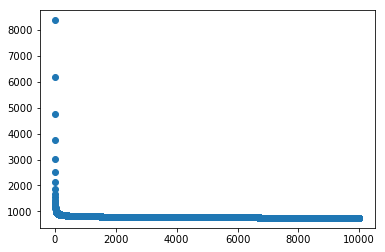

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8230)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

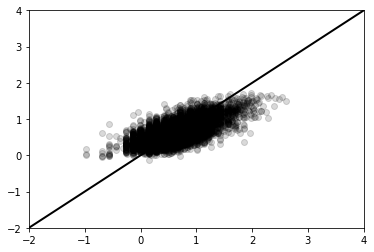

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_mob_home.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 271.8410
[torch.FloatTensor of size 1]

In [20]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [21]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2748)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

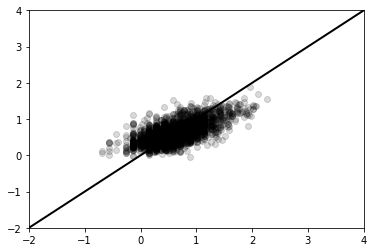

In [22]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [23]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_mob_home.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [24]:
# Validation set predictors
test_predictors = test_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [25]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 261.1981
[torch.FloatTensor of size 1]

In [26]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [27]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2699)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.41747 + 7.67485


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

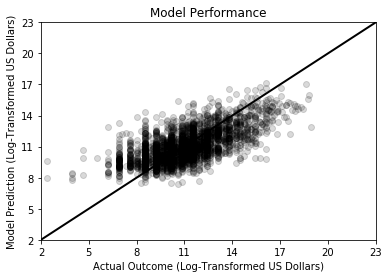

In [28]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [29]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0477 -0.0403 -0.0670  0.0079 -0.0799  0.1510  0.0672  0.1136  0.0335  0.1282
 0.0754  0.0648  0.0368 -0.1022 -0.0924 -0.0167 -0.0590 -0.0463 -0.0221  0.0284
 0.0376  0.1008 -0.1763  0.0041  0.0044 -0.2294  0.1014 -0.0395 -0.0527  0.0621
-0.0207  0.1484  0.0212  0.1760 -0.0578  0.1269  0.1057  0.1278 -0.0155 -0.0792
 0.1591 -0.0431  0.1528  0.0544 -0.0144 -0.0608  0.1269 -0.0372  0.1246  0.0350
 0.0175  0.0153 -0.1384  0.1323  0.1431  0.0995  0.0461  0.0307 -0.0674 -0.0789
-0.0983  0.0549  0.2145 -0.0869 -0.0642  0.0639 -0.1176 -0.1124 -0.0882 -0.0392
 0.1029 -0.0491  0.1245  0.0866  0.1615  0.0855  0.0929 -0.0949 -0.0226 -0.0506
 0.1358  0.1266  0.0110  0.0321  0.0508  0.0628 -0.1532 -0.0855 -0.0931  0.1476
-0.1611 -0.0408  0.1884  0.1519 -0.0894  0.0043  0.0765 -0.1659 -0.2164 -0.0027
 0.1034 -0.0632  0.0330 -0.0333  0.0698 -0.0684  0.0892 -0.0794 -0.0810  0.1189
 0.0365  0.2694  0.0480  0.1521 -0.0098 -0.0571  0.0048 -0.0629  0.0418  0.1263
-

In [30]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1798  0.1017 -0.2474  0.0881  0.0484  0.2184 -0.0801 -0.1309  0.1973  0.1758

Columns 10 to 19 
-0.2242  0.1685  0.1938  0.2435 -0.0381  0.1276  0.2837  0.1125 -0.0890 -0.2007

Columns 20 to 20 
-0.2009
[torch.FloatTensor of size 1x21]

## Round 2: Two-Hidden-Layer Neural Network

In [31]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [32]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 1))

In [33]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 6e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

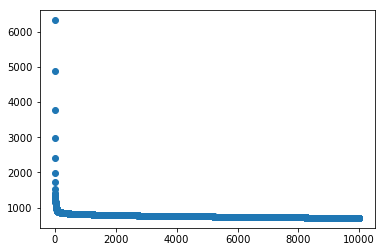

In [34]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [35]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

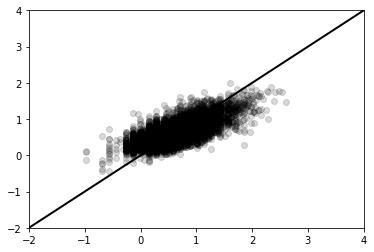

In [36]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [37]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 276.0473
[torch.FloatTensor of size 1]

In [38]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

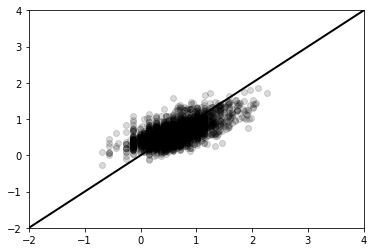

In [39]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [40]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 260.1563
[torch.FloatTensor of size 1]

In [41]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

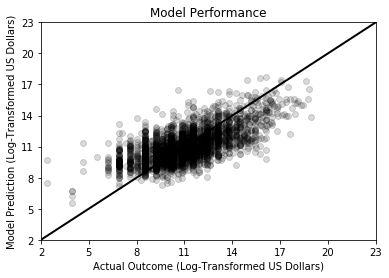

In [42]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [43]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1667  0.2029  0.0652 -0.1042 -0.0666  0.0017 -0.0084  0.0981  0.0361  0.0577
-0.0326  0.1247  0.0628  0.0414  0.0633  0.1582 -0.0326 -0.1683  0.0487 -0.0979
 0.0629 -0.1037  0.0529  0.0874  0.2984  0.0365  0.2627  0.0197  0.0031  0.0013
 0.0200 -0.1013 -0.1373 -0.0177 -0.1304 -0.0209 -0.0528  0.0752 -0.0630  0.1081
 0.0355  0.1913  0.1036  0.1685  0.0909 -0.0415 -0.0137  0.0591 -0.0470 -0.0339
-0.0156 -0.2142  0.1597  0.0214  0.1942 -0.2351  0.0848 -0.0084  0.0537 -0.0802
 0.0693  0.1853 -0.0741  0.0226  0.1806 -0.0967 -0.0058  0.0043  0.0606 -0.1481
-0.0078 -0.2085  0.0558 -0.0057 -0.2214  0.0147  0.0397  0.1362 -0.2394 -0.1288
-0.0443  0.0522 -0.0042 -0.0412 -0.1620 -0.1810 -0.0294 -0.0771  0.1316 -0.0522
 0.1534 -0.0341 -0.0323  0.1855 -0.1303  0.1169  0.0626 -0.0645 -0.0221 -0.0677
 0.1736  0.0204 -0.1703  0.0413 -0.1839  0.0826  0.0643 -0.1569  0.1349  0.1456
-0.0346 -0.0555 -0.1430  0.1542 -0.0488  0.0208 -0.1682  0.0065  0.1679  0.0915
 

In [44]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.1750 -0.1116  0.1716  0.0591  0.2193  0.1427  0.1249 -0.4166  0.1356 -0.1554
-0.1528  0.0196 -0.2094  0.0871 -0.1170 -0.0173  0.1334  0.1949  0.0811 -0.0593
 0.1572 -0.2039  0.0184 -0.0961 -0.0777  0.1352  0.0156 -0.1994 -0.1817 -0.0871
-0.0320  0.1976 -0.1585  0.0150 -0.1761 -0.1321 -0.2388 -0.2296 -0.1134  0.1529
 0.0595 -0.0543  0.1441  0.1588 -0.0611 -0.2076 -0.0874 -0.1163 -0.1029 -0.2070
-0.0121 -0.2529  0.3177 -0.0412  0.2266  0.0423 -0.1040 -0.1263 -0.1690 -0.0341
 0.0435 -0.3944 -0.2055 -0.2189  0.2388 -0.1460  0.0695 -0.1007  0.1028 -0.2361
-0.2419 -0.0453 -0.2020 -0.2296 -0.1611  0.1716  0.1614  0.0688 -0.0264  0.1583
 0.1957 -0.0361 -0.0289  0.2145  0.0669  0.0673  0.1707 -0.1450  0.1597 -0.0978
 0.0472  0.1503 -0.0420 -0.1439  0.0107  0.1692 -0.0326 -0.0489  0.0187  0.0355
-0.1388  0.0506  0.1205 -0.0093  0.0741 -0.1998 -0.0444 -0.0196 -0.1098  0.2668
 0.2445  0.0415  0.1565  0.0895  0.2179  0.0500  0.1178  0.0168  0.0291  0.0813
-

In [45]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.6433  0.1901 -0.1577 -0.4201 -0.3107 -0.3938 -0.5881 -0.4312  0.1572  0.1332

Columns 10 to 13 
 0.5784  0.4660  0.0554  0.1384
[torch.FloatTensor of size 1x14]

## Round 3: Three-Hidden-Layer Neural Network

In [46]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [47]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 1))

In [48]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

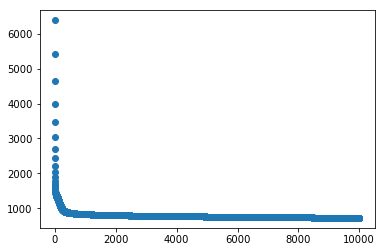

In [49]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [50]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

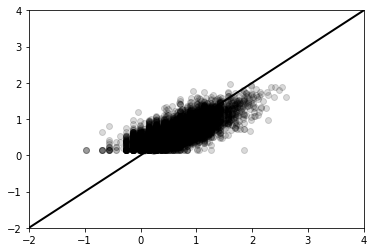

In [51]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [52]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 272.7820
[torch.FloatTensor of size 1]

In [53]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

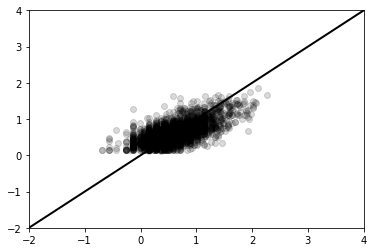

In [54]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [55]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 264.7704
[torch.FloatTensor of size 1]

In [56]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

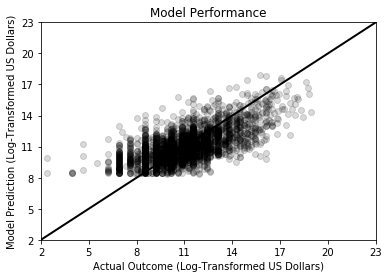

In [57]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [58]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0563  0.0831 -0.1808  0.2467 -0.0727 -0.2191  0.1507  0.0370 -0.0115 -0.0341
 0.0800  0.1319  0.0650  0.1807  0.0540 -0.0885  0.0037 -0.0566 -0.0304 -0.0474
 0.0282  0.0832 -0.0596 -0.1787 -0.1423  0.0970 -0.0441 -0.0724 -0.1093 -0.0381
 0.0111  0.0572 -0.0076  0.0009  0.0239 -0.1101 -0.1104  0.1418 -0.0406  0.0935
-0.0562  0.1131 -0.0905  0.0291 -0.2043  0.0432 -0.0520 -0.1154 -0.0859  0.0600
-0.0817 -0.1248 -0.0218  0.1056 -0.1874 -0.0543 -0.0563 -0.0158  0.0348 -0.1023
-0.0480 -0.0552  0.0158 -0.1239  0.0320  0.0693 -0.1348 -0.1018 -0.0779 -0.1425
-0.1124  0.0041 -0.0822 -0.1744 -0.1802 -0.0529  0.2207  0.0200  0.0030 -0.0950
 0.0361  0.0331  0.2346 -0.0141  0.2110 -0.2205 -0.0493 -0.1025  0.0446  0.0645
 0.0054  0.1351 -0.0095 -0.0047  0.1122  0.3429 -0.1119 -0.0563  0.0293  0.1004
-0.0590  0.0637  0.0965 -0.1501  0.0235  0.0305 -0.1948 -0.1691 -0.0362  0.1992
 0.0946 -0.1373 -0.0948 -0.0779 -0.1207  0.0468 -0.0952 -0.1498 -0.0486 -0.1714
 

In [59]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1579  0.2273  0.1988  0.0145 -0.0794  0.0316 -0.1500  0.0504 -0.1329 -0.0937
 0.1049 -0.1006 -0.1317 -0.1037  0.2916 -0.2166 -0.0883  0.0235  0.2702  0.2258
-0.0679 -0.1602 -0.1215 -0.1169 -0.1358  0.1144  0.2038 -0.1508 -0.2220  0.1066
 0.0429  0.0888  0.1096 -0.0815  0.0585 -0.0314 -0.0586 -0.0358 -0.1244  0.2223
 0.2678  0.0065  0.1753  0.1183  0.1563 -0.1672  0.1579  0.1983  0.0360 -0.1715
 0.1857 -0.1429  0.0947 -0.1244 -0.1794  0.1542  0.1870 -0.0503 -0.1922 -0.1580
-0.0130 -0.0396  0.2313  0.1197  0.0539 -0.0754  0.2044  0.1356 -0.0424  0.1756
-0.0826 -0.1659  0.1123 -0.1285 -0.0015 -0.0970  0.1753  0.0902 -0.0983  0.0233
 0.0549 -0.1521  0.0618  0.1216 -0.1561  0.0146 -0.1664  0.1508 -0.2284 -0.1390
-0.0535 -0.0080 -0.1619  0.0043  0.1178 -0.1670 -0.1769 -0.1702 -0.2110 -0.0052
 0.0103  0.0979  0.1785 -0.1816 -0.2243  0.0160  0.0185  0.0139 -0.0323  0.2248
 0.1216  0.1530  0.1106 -0.0387 -0.0654 -0.1702  0.1186  0.2329  0.2301 -0.1925
-

In [60]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2170 -0.1204  0.1821  0.2058 -0.2460 -0.2223  0.0056  0.0103 -0.1410 -0.0234
 0.0692 -0.1669  0.1705  0.0310  0.1480 -0.1700 -0.2178 -0.2114 -0.0912  0.0319
-0.0354 -0.0563 -0.0772 -0.1489  0.2065  0.1693 -0.0451 -0.2486 -0.1470  0.1353
 0.3215 -0.0498 -0.1613 -0.0436 -0.2568  0.0176  0.1261 -0.3778 -0.2506 -0.1223
-0.2645  0.1804  0.1729 -0.1679 -0.0976 -0.1934 -0.0653 -0.0502  0.1431 -0.2031
-0.1074 -0.1294 -0.0463 -0.2610 -0.1974 -0.1250  0.2212 -0.2215  0.2244  0.2546
-0.1204  0.0771  0.1631  0.2516 -0.1776  0.0031  0.0896  0.0842 -0.1618  0.0698
 0.2707  0.2653 -0.1207  0.1299 -0.0447 -0.0856 -0.2094 -0.2173 -0.1433  0.1561
 0.0035  0.4048 -0.4059  0.3270 -0.3867 -0.0907 -0.1284  0.1528 -0.3760  0.1116

Columns 10 to 13 
 0.2485 -0.0593 -0.0790 -0.0885
-0.1058 -0.1418 -0.2372  0.1509
 0.2007  0.0755 -0.1688 -0.1784
 0.1014  0.3788  0.2402 -0.3523
 0.2462 -0.1299 -0.1695  0.0269
 0.0515 -0.1374  0.0032 -0.0917
 0.0225  0.0537  0.0212 -0.034

In [61]:
model[(6)].weight

Parameter containing:
 0.2974  0.2661 -0.3011  0.7160 -0.2500 -0.0347 -0.2402  0.5084  0.9351
[torch.FloatTensor of size 1x9]

## Round 4: Four-Hidden-Layer Neural Network

In [62]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [63]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 1))

In [64]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

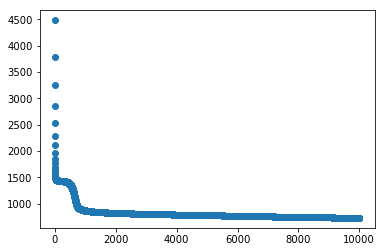

In [65]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [66]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

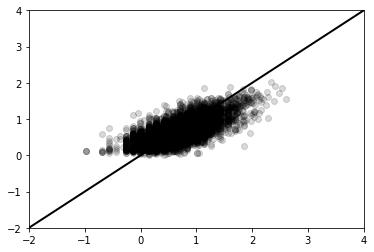

In [67]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [68]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 274.4393
[torch.FloatTensor of size 1]

In [69]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

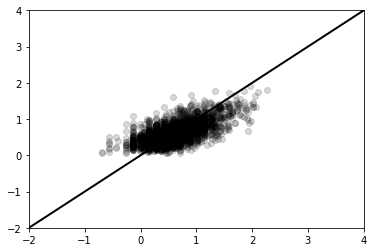

In [70]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [71]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 262.3223
[torch.FloatTensor of size 1]

In [72]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

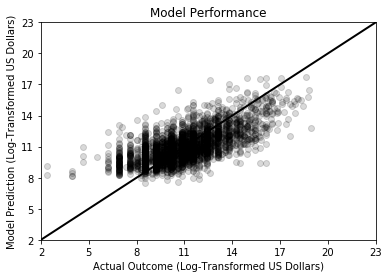

In [73]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [74]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0395 -0.0498 -0.0890  0.0496 -0.1560 -0.1121  0.0139 -0.0548 -0.0617  0.0615
 0.2394  0.1180 -0.1295  0.0257  0.0823  0.0336  0.0207  0.1095  0.1122  0.0519
-0.0783  0.0012 -0.0364  0.2818 -0.1016  0.0586  0.1771  0.0383  0.1777  0.1893
 0.1689  0.0115 -0.1009 -0.0811 -0.2045  0.0656  0.1772 -0.0977 -0.1926  0.1370
 0.1098  0.0480  0.0699 -0.0476  0.1297 -0.0810  0.1269  0.0220 -0.0417 -0.0058
 0.0250  0.0511  0.0063 -0.0330  0.0403 -0.0454  0.1195 -0.0775 -0.1516  0.1215
-0.0498  0.1899  0.0858  0.2230  0.1082 -0.0619  0.0302 -0.1515  0.0935  0.1217
-0.0187  0.1197 -0.0308 -0.1619 -0.2127 -0.2033  0.1170  0.1326 -0.1419  0.1107
-0.0786  0.1434 -0.0083  0.0202 -0.0549  0.2897 -0.1438  0.0548 -0.1281  0.0126
 0.0112  0.1355 -0.0683 -0.0361 -0.1434 -0.1840  0.0257  0.0107  0.1041 -0.0717
 0.0268  0.0402 -0.0144  0.0164  0.1066  0.0233 -0.0857  0.1503 -0.1139  0.0679
 0.1115 -0.1104 -0.0556  0.0199  0.1306 -0.1455 -0.1990 -0.1319  0.0562 -0.2083
-

In [75]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1375  0.1742  0.1625  0.1621 -0.0825  0.0199 -0.2358 -0.1420 -0.2041 -0.0472
 0.1075  0.1036  0.0729  0.0930  0.0967 -0.2087 -0.1576 -0.1018  0.0279 -0.1415
-0.2179  0.1484  0.1343  0.1616  0.2008  0.1080  0.0479  0.1019 -0.0499  0.0461
 0.1821  0.0819  0.1338 -0.2017 -0.2521  0.1478 -0.1315 -0.0653  0.1109 -0.0266
 0.1245  0.0981  0.2492  0.1553 -0.0578 -0.0198  0.1441  0.2270  0.1511 -0.0595
 0.2027 -0.1731 -0.1669 -0.0322 -0.1195 -0.2001  0.1098  0.0714  0.1315 -0.1932
-0.2427  0.2087 -0.2207 -0.0413  0.0311 -0.1269  0.2524 -0.0272 -0.0752 -0.0443
-0.0173 -0.1455  0.1596  0.1398  0.1776  0.1081  0.1076 -0.0755  0.1079 -0.1482
-0.2086 -0.0272  0.1256 -0.1468  0.1173 -0.1290 -0.2000  0.2457 -0.1750  0.0165
-0.1115  0.1618 -0.0383 -0.2352  0.1973  0.0321  0.0079  0.1182 -0.1231 -0.0209
 0.0361 -0.0158 -0.1954 -0.1096 -0.2117 -0.0455 -0.1912  0.1079  0.1089  0.1468
 0.2294  0.2235  0.0474 -0.1733  0.1550 -0.1750  0.0935 -0.0036  0.1001  0.2095
 

In [76]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1418 -0.2228  0.0862  0.1797 -0.0520 -0.2281 -0.1886  0.2141  0.0267 -0.2171
 0.0778 -0.2017  0.1766 -0.2442 -0.0030  0.1615 -0.0318  0.0725 -0.0907 -0.1205
-0.0810 -0.1893  0.1895 -0.1389 -0.0833 -0.1676  0.1133  0.2023  0.1263  0.2998
-0.0307 -0.2874  0.2035 -0.2773  0.2054 -0.0684 -0.3047  0.0523 -0.0286 -0.2447
 0.0492 -0.0714 -0.0497 -0.0807 -0.1831  0.1060  0.4452  0.3361 -0.2692  0.3719
 0.1378 -0.0129 -0.0960  0.0871  0.2156 -0.0418 -0.2100  0.0366  0.2644 -0.1023
 0.2411  0.0813 -0.0501 -0.1769 -0.1323  0.1660 -0.2249  0.1969  0.1343  0.0696
-0.1680  0.2346  0.0180  0.0370  0.1373 -0.2120  0.1971 -0.2101 -0.2228 -0.2259
 0.2479  0.1950  0.0108 -0.0914  0.0777  0.2034 -0.0632  0.0903 -0.1524  0.0128

Columns 10 to 13 
-0.1642 -0.2571  0.0129  0.2565
-0.1942 -0.2398  0.1086 -0.1626
 0.0801 -0.0257 -0.0183  0.0206
 0.0855  0.0788  0.1050  0.1105
-0.0805  0.0321  0.2592 -0.3109
 0.1580  0.2931 -0.2691  0.4021
 0.2041  0.0222 -0.2256 -0.125

In [77]:
model[(6)].weight

Parameter containing:
-0.1442 -0.2063  0.3752  0.4380  0.5824 -0.3815 -0.0393 -0.0971 -0.0324
-0.2297  0.1636 -0.0368 -0.0484 -0.1069  0.4493 -0.1106  0.0451 -0.2962
-0.1543  0.2170 -0.2476  0.0946  0.1027 -0.2746  0.2510  0.2660 -0.0911
-0.0355 -0.1660 -0.1584 -0.1712  0.2986 -0.2927  0.1214 -0.0714 -0.2265
 0.0250 -0.0747  0.0172 -0.1844  0.5145 -0.0316 -0.2448  0.3339  0.0589
-0.2350  0.1475 -0.2882  0.2598  0.2214 -0.1320  0.0251 -0.0132  0.2384
[torch.FloatTensor of size 6x9]

In [78]:
model[(8)].weight

Parameter containing:
 0.8880 -0.4999 -0.3150  0.2218  0.4823 -0.3844
[torch.FloatTensor of size 1x6]

## Round 5: Five-Hidden-Layer Neural Network

In [79]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [80]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))

In [81]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

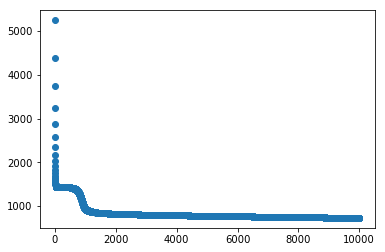

In [82]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [83]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

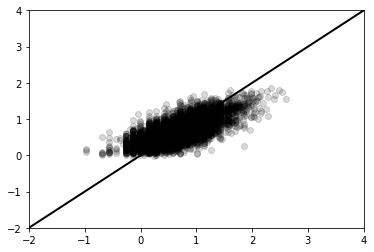

In [84]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [85]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 275.5223
[torch.FloatTensor of size 1]

In [86]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

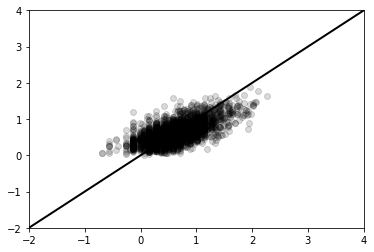

In [87]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [88]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 266.2724
[torch.FloatTensor of size 1]

In [89]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

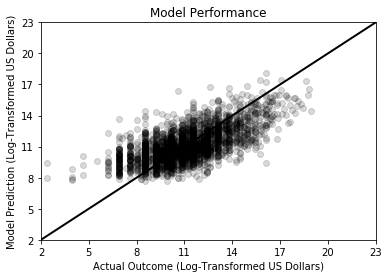

In [90]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [91]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0234 -0.0431  0.0651 -0.0451 -0.2062  0.0642 -0.0207 -0.1387 -0.1466 -0.1031
-0.0653  0.0247  0.1219  0.0731  0.0924  0.1400 -0.1378 -0.0991 -0.1160  0.1090
-0.0433  0.0349  0.1701 -0.0592 -0.0024 -0.1477 -0.0643 -0.1790 -0.0447 -0.1134
 0.2023 -0.0675  0.0238 -0.1175 -0.0581  0.2272 -0.1295 -0.1367  0.2282  0.1836
-0.0378  0.0592 -0.1136 -0.1685  0.1514 -0.0441  0.0054  0.0405 -0.0111 -0.0462
 0.2981  0.0505 -0.1284  0.2178  0.0579  0.1405 -0.0051 -0.0134  0.0026 -0.0581
 0.0344 -0.0309 -0.0462 -0.1428 -0.2082 -0.0722  0.1039  0.0407  0.0398  0.0264
-0.0997  0.0315 -0.1159 -0.0292  0.0252 -0.0244 -0.0183 -0.0283 -0.1079  0.1887
 0.1240  0.1482  0.1261 -0.1875 -0.0493  0.0016  0.1158 -0.1284 -0.0901  0.1736
-0.1072  0.1000  0.0059 -0.0713 -0.1296  0.1362 -0.0889  0.0520 -0.0003 -0.1798
-0.2136  0.1800  0.1564  0.1994  0.2659 -0.0170 -0.0003  0.0782  0.0699  0.0898
 0.0278 -0.0938  0.1531  0.0940  0.3273 -0.0439  0.0408  0.0010 -0.0146  0.0326
-

In [92]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0445  0.0230 -0.0498  0.0945 -0.0624 -0.0046  0.1244 -0.1386  0.1513  0.1186
 0.0168  0.0086  0.1653 -0.1509  0.0652  0.1640 -0.1239 -0.0709  0.1901  0.2109
-0.0495 -0.1209 -0.1580 -0.1768  0.0683  0.1609  0.0722  0.1572  0.1796  0.0224
-0.0185  0.0603 -0.0554  0.0011  0.0606  0.1698  0.1523 -0.1514 -0.1583 -0.1487
 0.1502 -0.1683  0.1530 -0.1421 -0.1762 -0.0772  0.1479  0.0467 -0.1324  0.0120
-0.0012 -0.2133  0.0932  0.2639  0.1042  0.2717 -0.1844 -0.0839  0.1345  0.1025
 0.0803 -0.1749 -0.1889 -0.0930 -0.1211 -0.1344 -0.1067  0.1529  0.0679 -0.2091
-0.1750 -0.1191 -0.1608  0.1967 -0.1342 -0.2479  0.0794 -0.0421  0.0997 -0.1145
 0.2330 -0.1768  0.0949  0.0705 -0.0623 -0.0389  0.0938  0.1457 -0.1424  0.0309
 0.1325  0.1940 -0.1347 -0.1694 -0.0336  0.2287 -0.0990 -0.1306 -0.1551 -0.1779
-0.0735  0.0573  0.1749  0.0661 -0.2090 -0.0987 -0.0504 -0.2029  0.1199 -0.1029
 0.1516  0.2238 -0.0960  0.1009 -0.0327 -0.2108  0.0323 -0.1370  0.0819  0.0944
 

In [93]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.0589 -0.0150 -0.1360 -0.0185 -0.1678  0.4929  0.2710 -0.1409 -0.1523 -0.0615
-0.2772  0.1608 -0.1472  0.1280 -0.2365 -0.0113 -0.1722  0.0777  0.1538  0.1108
-0.0860  0.2227 -0.2857 -0.2215 -0.0375 -0.1208 -0.1390  0.2478 -0.1008 -0.2572
-0.0554  0.1414  0.1421  0.2762  0.1389 -0.1574  0.2282 -0.2641  0.0770  0.0337
-0.0453  0.2964 -0.3976  0.0289 -0.0887  0.3322 -0.2188 -0.2146 -0.2162  0.0236
 0.2268  0.2153  0.3109 -0.1292 -0.0285 -0.2136 -0.1966 -0.0237  0.0642 -0.0721
 0.1407 -0.1719 -0.1480 -0.0760  0.1061 -0.1594  0.0741  0.1583  0.0162  0.2324
-0.1493 -0.1446 -0.2541 -0.2157 -0.2286 -0.0165 -0.1276 -0.0675 -0.0785  0.0451
-0.1015 -0.0175  0.2477  0.1856  0.2375 -0.2126  0.1249  0.1936 -0.0307  0.2865

Columns 10 to 13 
 0.2725 -0.1784 -0.1991  0.1296
 0.1026 -0.2487 -0.1746 -0.1842
-0.1961 -0.1478 -0.1767 -0.1008
-0.2327  0.1631 -0.2477  0.0769
 0.1696 -0.0545 -0.2721  0.2065
-0.0597  0.0788 -0.0930  0.2906
-0.1363 -0.2011  0.0736 -0.069

In [94]:
model[(6)].weight

Parameter containing:
 0.0042 -0.1319 -0.1943 -0.2017  0.4298 -0.0062  0.1181 -0.2159  0.2127
-0.2876  0.1349 -0.0178 -0.2747 -0.1475  0.2351 -0.1367 -0.1098 -0.2252
 0.4996  0.1381 -0.2096  0.0439  0.3094 -0.1840 -0.2833 -0.0951 -0.0070
-0.2020 -0.1342 -0.1028  0.2229 -0.3504  0.4283 -0.2642 -0.0239  0.2438
 0.0229 -0.2003 -0.0777 -0.2260 -0.3125  0.0117  0.0633  0.1469  0.3277
 0.4693 -0.0022  0.2156  0.1674  0.4036  0.1290  0.2603 -0.1590 -0.1793
[torch.FloatTensor of size 6x9]

In [95]:
model[(8)].weight

Parameter containing:
-0.1934 -0.1112 -0.3411  0.1067 -0.3749 -0.0559
-0.2707  0.1899  0.2781  0.1398  0.2009 -0.3097
-0.2413 -0.1989 -0.5347  0.6510 -0.1074 -0.0306
 0.1504 -0.2343  0.2758 -0.5230 -0.0028  0.6233
[torch.FloatTensor of size 4x6]

In [96]:
model[(10)].weight

Parameter containing:
 0.1027 -0.1003 -0.8764  0.7739
[torch.FloatTensor of size 1x4]

## Round 6: Six-Hidden-Layer Neural Network

In [97]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [98]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [99]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

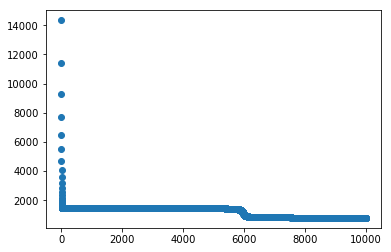

In [100]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [101]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

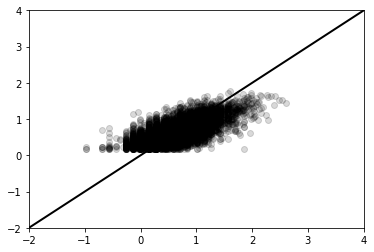

In [102]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [103]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 274.0562
[torch.FloatTensor of size 1]

In [104]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

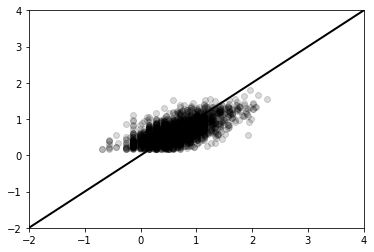

In [105]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [106]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 263.7682
[torch.FloatTensor of size 1]

In [107]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

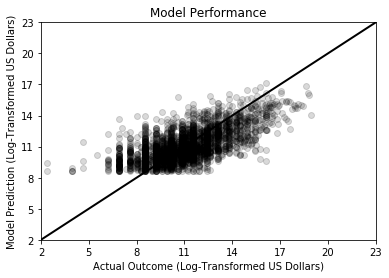

In [108]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [109]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0462  0.0053 -0.0163 -0.1811 -0.0705 -0.0269 -0.0958  0.1063  0.1686  0.0989
-0.0156 -0.0091  0.1699 -0.0266 -0.0723  0.0937  0.1639  0.2273  0.1222 -0.1026
 0.1172  0.0768  0.1761 -0.0445 -0.0668 -0.0956 -0.0351 -0.1200 -0.0609 -0.0230
 0.0204  0.0627  0.1508  0.0467  0.0696 -0.0466  0.1064  0.0128 -0.1628 -0.0737
 0.0176  0.0120  0.0023 -0.0076  0.0757 -0.0428 -0.0423 -0.0207  0.0631  0.1339
 0.0530  0.1439  0.0308 -0.0009  0.0711 -0.1243 -0.0835 -0.0055 -0.0028  0.0956
-0.0669 -0.1238  0.0532  0.0672 -0.0345 -0.0724 -0.0513  0.0881  0.1242 -0.1429
 0.0845  0.0605 -0.0358  0.0485  0.2327 -0.0500  0.0655 -0.0255  0.1627 -0.1214
-0.1680  0.0281 -0.0420 -0.1683 -0.0545 -0.0087 -0.0699 -0.0410 -0.0026 -0.0244
-0.0317 -0.0596  0.0570  0.1857 -0.0161  0.0081 -0.1112  0.0989  0.0101 -0.0609
 0.0798  0.0400 -0.0692 -0.1722 -0.0843  0.1712 -0.0895  0.0111 -0.1262 -0.0656
 0.1015  0.1338  0.1579 -0.0962 -0.0552 -0.1507 -0.1464 -0.1676  0.0546  0.0945
 

In [110]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0646  0.1729  0.2309  0.1478  0.0631 -0.2032 -0.0290  0.1738 -0.1642  0.1116
-0.0058  0.0845  0.1322  0.0561  0.0582  0.1734  0.0601  0.2696 -0.1296 -0.0252
 0.0417  0.1463  0.1236  0.0117  0.0849 -0.0774  0.0677  0.0935 -0.1600  0.1588
 0.1784  0.1771  0.1116  0.0883 -0.0026 -0.1787 -0.0113 -0.1099  0.1792  0.0224
-0.1247  0.0527 -0.2115  0.2139  0.1617  0.1240  0.1052  0.1624  0.0925  0.2262
-0.1735 -0.1886  0.0214 -0.1839  0.0866 -0.0082 -0.0023 -0.0802 -0.0962  0.2140
 0.0148  0.0542 -0.1480  0.0318 -0.1004  0.1649  0.1015  0.2262 -0.2163  0.1265
-0.1951 -0.0990 -0.1261  0.1811 -0.1098 -0.1180 -0.0465 -0.1277 -0.2125  0.1739
 0.0829 -0.1073  0.1508 -0.1149 -0.0442 -0.1063 -0.1172  0.1508 -0.0279  0.1433
-0.0029  0.0323 -0.0279  0.0436  0.0941 -0.0080  0.0503 -0.1730 -0.1622  0.1363
 0.2164 -0.2225  0.1367  0.0761  0.2241  0.0786  0.0268  0.2005 -0.1078  0.1716
 0.1674 -0.0951 -0.0220 -0.1775 -0.2253 -0.1022  0.0588 -0.0351  0.1410  0.1153
-

In [111]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2244  0.0727  0.2468 -0.0279 -0.2065  0.2135  0.1704  0.0675  0.2264  0.1207
-0.1059 -0.1520  0.1984  0.0727 -0.0986  0.1732 -0.2176 -0.2286  0.2553 -0.2358
-0.0236 -0.0750 -0.1113 -0.1209 -0.2141  0.0926 -0.0844 -0.1859  0.1790 -0.1022
 0.0559 -0.0578 -0.0737 -0.0458 -0.1610  0.1886  0.1195 -0.2092 -0.1243  0.0458
-0.1794 -0.1965  0.1716 -0.1641 -0.2267 -0.0469 -0.2637 -0.1079  0.1484  0.2301
-0.0506  0.0520  0.1529 -0.2663  0.0526 -0.1572  0.2389 -0.1541  0.2719 -0.0684
-0.2081  0.3683 -0.0323 -0.1555  0.0879 -0.1863  0.1513 -0.0239 -0.2003  0.0014
-0.1587 -0.1661  0.2500  0.2291 -0.1827 -0.2161 -0.1046  0.0083  0.1017  0.2571
-0.1500  0.0081  0.1673  0.1632 -0.1089 -0.0518 -0.2062 -0.1874 -0.0806 -0.2659

Columns 10 to 13 
-0.0672 -0.1680  0.0520 -0.0791
 0.1037 -0.0900  0.1388  0.1753
-0.0718  0.0596  0.2096 -0.2161
-0.0701  0.0650 -0.2415  0.1092
-0.2303 -0.2601 -0.0509  0.2465
 0.2090 -0.1456  0.0993  0.3399
 0.2763  0.0652 -0.0571  0.417

In [112]:
model[(6)].weight

Parameter containing:
-0.2578  0.0076 -0.0846  0.0302 -0.0525  0.4015  0.5376  0.0399  0.1110
 0.2985  0.0772  0.1250  0.2900 -0.0131  0.0024 -0.1398  0.0588 -0.1512
-0.1636  0.2425 -0.1091 -0.0443  0.2070 -0.2063 -0.3139 -0.2008  0.2934
 0.0052 -0.2089 -0.2364 -0.0599 -0.1383 -0.0265  0.3017 -0.2114 -0.2281
 0.2444 -0.0574  0.1958  0.0868  0.2313 -0.2415 -0.1189 -0.1831  0.3257
 0.1735 -0.2406  0.1970 -0.0460  0.0778 -0.1041 -0.1506 -0.1196  0.1250
[torch.FloatTensor of size 6x9]

In [113]:
model[(8)].weight

Parameter containing:
 0.7398 -0.2061 -0.3510 -0.0110 -0.1109  0.3295
-0.0393 -0.1288  0.1840  0.0341 -0.2074  0.1410
-0.1284 -0.3427  0.2610 -0.1145  0.7015  0.2745
 0.2017 -0.2442  0.1987  0.3346 -0.0421  0.3730
[torch.FloatTensor of size 4x6]

In [114]:
model[(10)].weight

Parameter containing:
 0.7423 -0.3350 -0.8175  0.2896
-0.0257  0.3574 -0.2083 -0.1653
-0.3172  0.3506 -0.1952  0.0404
[torch.FloatTensor of size 3x4]

In [115]:
model[(12)].weight

Parameter containing:
 0.8890 -0.2958  0.2578
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [116]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [117]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(32, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [118]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

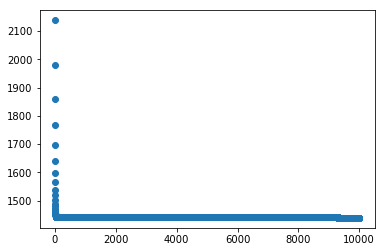

In [119]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [120]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

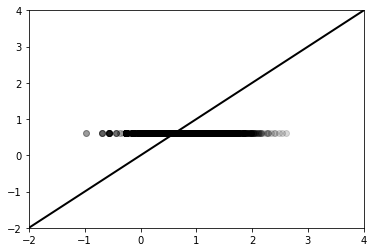

In [121]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [122]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 474.4272
[torch.FloatTensor of size 1]

In [123]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

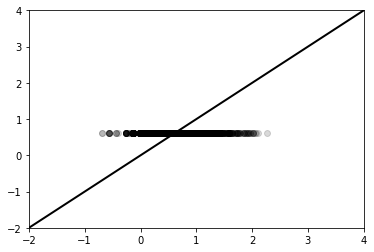

In [124]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [125]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 463.4874
[torch.FloatTensor of size 1]

In [126]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

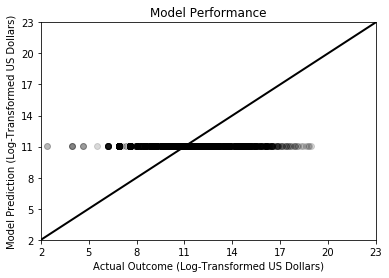

In [127]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [128]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1318  0.0740 -0.1067 -0.0350  0.1403  0.0839 -0.0732  0.1681  0.1397  0.0127
-0.1693 -0.0837  0.0919  0.0489  0.0547  0.0012  0.0575  0.1612  0.0367  0.0589
 0.0220  0.1051  0.1496 -0.1253  0.0182 -0.0406  0.0162  0.0703  0.1215 -0.0364
 0.0432  0.0875  0.1251 -0.0321  0.0334  0.1140 -0.0499 -0.0334 -0.1423 -0.0269
-0.1350  0.0871 -0.0085  0.0581  0.0097 -0.0447  0.0763 -0.0615  0.0751 -0.1750
-0.1052  0.0029 -0.1697  0.0817 -0.0616  0.1450 -0.0347 -0.0527  0.0091 -0.1727
-0.1613  0.1496  0.0938 -0.0985  0.1704 -0.1321 -0.0876 -0.0220  0.1667  0.1754
 0.0366  0.0618 -0.1718 -0.0990 -0.1506  0.0330 -0.1237 -0.0863  0.0476 -0.0208
 0.1224  0.0110 -0.0401  0.1645  0.1327 -0.1091 -0.1516 -0.0450  0.0954  0.1417
-0.0572 -0.0247 -0.1363 -0.1601 -0.0199  0.0999  0.1125 -0.0917  0.0146  0.0754
 0.0222  0.0385  0.0742 -0.0229 -0.0523 -0.0010 -0.0261  0.1321  0.1032  0.0084
 0.0338 -0.0530  0.1692 -0.0567  0.0116 -0.1466 -0.1130  0.1510 -0.0343  0.0360
-

In [129]:
model[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1070  0.0014 -0.2064  0.1145  0.0690 -0.1283 -0.2037 -0.0088  0.0915 -0.1874
-0.0280  0.0065 -0.2116 -0.0716  0.2172  0.0734  0.0439  0.0085  0.0106  0.1902
-0.0253  0.0007  0.1300  0.0873 -0.1109 -0.0125 -0.1259 -0.2093  0.1419 -0.0683
-0.0980  0.0545 -0.0236  0.2141  0.0706 -0.1565 -0.0599  0.0999  0.0912  0.0353
-0.0857 -0.0895  0.1608  0.0189  0.0885  0.0417 -0.1007 -0.0021  0.0855 -0.1026
 0.1816  0.0561  0.0051  0.1310  0.1580 -0.1403 -0.0313 -0.0278 -0.1713  0.0594
-0.1231  0.1724 -0.1353  0.0083  0.1679 -0.0398 -0.0178  0.0168 -0.1218 -0.0495
-0.0088  0.1242  0.0941  0.1588  0.1772 -0.1966 -0.0827  0.2356 -0.1608 -0.0896
 0.1274  0.0606 -0.0354  0.1048 -0.1296 -0.1776  0.1430  0.0576  0.1836 -0.1358
-0.0029  0.1170  0.1372 -0.2114 -0.2096  0.0542 -0.0540  0.0190  0.1679  0.1937
-0.0967 -0.1117 -0.0322 -0.1513  0.1679 -0.1494  0.0995 -0.0686  0.1967  0.1881
 0.0057 -0.1013 -0.1002 -0.0124  0.0948  0.0000  0.0341 -0.1073  0.0919 -0.1975
 

In [130]:
model[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2589 -0.0209 -0.2146  0.0983 -0.2538  0.0082 -0.2034 -0.1352  0.1754 -0.2278
-0.2070 -0.1376 -0.1420 -0.0416  0.0625  0.0801  0.0484 -0.1560 -0.0761  0.1142
-0.1439  0.0770 -0.2205 -0.1621  0.0111  0.0735  0.1822 -0.1895  0.2111  0.1663
 0.2073  0.1536 -0.0171  0.0007  0.1462 -0.1959  0.0306  0.2272 -0.1901 -0.1933
 0.2366  0.0725 -0.0488  0.0294  0.0161  0.2105  0.1266 -0.1524 -0.2674  0.2046
 0.2259 -0.1412  0.2639  0.2148  0.0775 -0.1702  0.2238  0.1573 -0.0437 -0.0238
 0.1841  0.2360  0.1616  0.1916 -0.1850  0.0680  0.0595  0.1077  0.0898  0.1982
-0.2434 -0.2204 -0.0725  0.0466 -0.0563 -0.1058  0.1536  0.2753 -0.0177 -0.1903
 0.2375 -0.0256  0.2332 -0.1581 -0.1505  0.1959  0.2653 -0.2114 -0.2215  0.0202

Columns 10 to 13 
-0.0418  0.2312 -0.0960 -0.1762
 0.0059 -0.0571 -0.1091 -0.1419
-0.0865  0.2265  0.0912 -0.0147
 0.1183  0.0282  0.2538 -0.1561
-0.1586 -0.0186  0.1459 -0.2102
-0.0227 -0.1870 -0.1861  0.0318
 0.1961 -0.1661 -0.1838 -0.086

In [131]:
model[(6)].weight

Parameter containing:
 0.2351 -0.0257 -0.0050  0.3427  0.1286  0.2375 -0.1519  0.2845 -0.0830
 0.0768 -0.2483 -0.3301 -0.2234  0.0202 -0.2776  0.3252 -0.0708 -0.1604
-0.2216 -0.1218 -0.2052 -0.1190  0.3315  0.2531 -0.0210 -0.0136 -0.1278
 0.2989  0.0487  0.0808 -0.2328  0.1512  0.3274 -0.1528  0.2162  0.1295
-0.1101  0.0472  0.0840 -0.0844  0.2870 -0.1831 -0.1859 -0.2578  0.3114
-0.1161 -0.1332 -0.0707 -0.3289 -0.0336 -0.1789 -0.1408  0.0104  0.2758
[torch.FloatTensor of size 6x9]

In [132]:
model[(8)].weight

Parameter containing:
 0.0716 -0.1003  0.3905 -0.0170  0.2004 -0.0932
-0.2608 -0.0612  0.0401 -0.0665 -0.2342 -0.3890
-0.0452 -0.3588 -0.3162 -0.1918  0.3729  0.2684
 0.3959 -0.0293  0.2146  0.2665 -0.1666  0.3941
[torch.FloatTensor of size 4x6]

In [133]:
model[(10)].weight

Parameter containing:
 0.1799  0.0095 -0.2510 -0.0272
-0.0119  0.4875 -0.0523 -0.3643
-0.3831  0.4906 -0.3999 -0.3185
[torch.FloatTensor of size 3x4]

In [134]:
model[(12)].weight

Parameter containing:
 0.5403  0.2611 -0.5264
-0.2476 -0.2923 -0.4936
[torch.FloatTensor of size 2x3]

In [135]:
model[(14)].weight

Parameter containing:
 0.6254 -0.4062
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [136]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [137]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(32, 1))

In [138]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

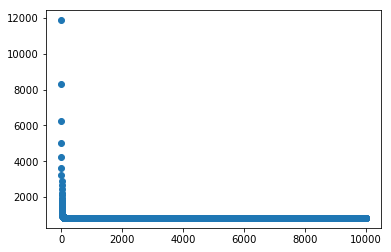

In [139]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [140]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8230)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

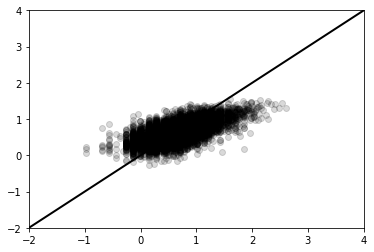

In [141]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [142]:
# Get the validation set predictions
y_valid_pred = model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 282.1913
[torch.FloatTensor of size 1]

In [143]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2748)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

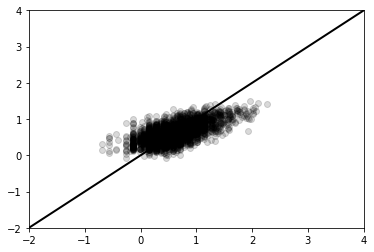

In [144]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.2: Test Set Performance

In [145]:
# Get the validation set predictions
y_test_pred = model(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 274.8005
[torch.FloatTensor of size 1]

In [146]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2699)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.41747 + 7.67485


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

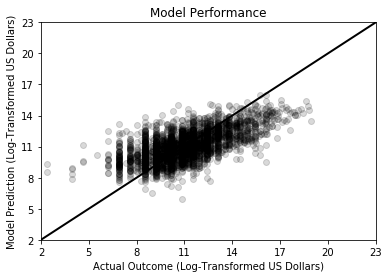

In [147]:
# Plot new predictions versus new data outcomes
plt.scatter(test_outcomes_list, y_test_pred_list, c = "black", alpha = 0.15)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [148]:
model[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0040  0.0156  0.0068  0.1541  0.1770 -0.0256 -0.0019 -0.0290  0.0351 -0.0208

Columns 10 to 19 
 0.0282 -0.0223  0.0184 -0.0214 -0.0034  0.0019 -0.0012  0.0164 -0.0054  0.0033

Columns 20 to 29 
 0.0082  0.0152  0.0527  0.0742  0.0139 -0.0025 -0.0755 -0.0076  0.0077  0.0370

Columns 30 to 31 
 0.0130 -0.0028
[torch.FloatTensor of size 1x32]